## Fastai model built from scratch

This notebook shows image classification using fastai without usg pretrained model

First, import everything needed.

In [1]:
# Python imports
import PIL.Image as Image
import os
import glob

# PyTorch imports
import torch
import torch.nn as nn
import torch.functional as F


# fastai imports
from fastai.vision.all import *

What is the size of our images?

In [2]:
pattern = r'C:\Users\Tosin OLUYEMII\VS Code\deeplearning projects\chess_pieces\*\*.jpg'

image_path_list = glob.glob(pattern)


# write an check code to confirm that all images in all folders have size (640,640)
image_size_list = []
for image_path in image_path_list:
    size = Image.open(image_path).size
    image_size_list.append(size) 

print(image_size_list)

[(640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (640, 640), (64

Now let's build our Datablock

In [3]:
chess_datablock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                      get_items=get_image_files,
                      get_y=parent_label,
                      splitter=RandomSplitter(seed=900))

chess_datablock.summary(r'C:/Users/Tosin OLUYEMII/VS Code/deeplearning projects/chess_pieces')

Setting-up type transforms pipelines
Found 300 items
2 datasets of sizes 240,60
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\Tosin OLUYEMII\VS Code\deeplearning projects\chess_pieces\White pawn\resized_1691059276510.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=640x640
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\Tosin OLUYEMII\VS Code\deeplearning projects\chess_pieces\White pawn\resized_1691059276510.jpg
    applying parent_label gives
      White pawn
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=640x640, TensorCategory(9))


Found 300 items
2 datasets of sizes 240,60
Setting up Pipeline: PILBase.create
Setting up Pipeline: 

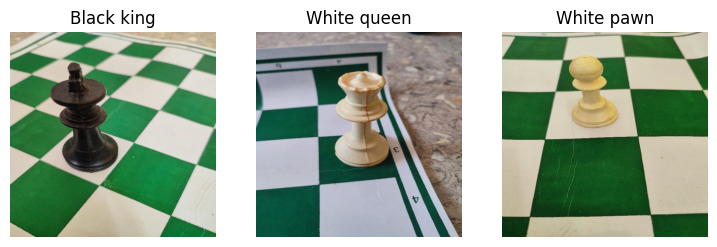

In [4]:
chess_dls = chess_datablock.dataloaders(r'C:/Users/Tosin OLUYEMII/VS Code/deeplearning projects/chess_pieces')
chess_dls.show_batch(nrows=1, ncols=3
                     )

Let's build the CNN model using torch

In [5]:
chess_model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=8, out_channels=1, kernel_size=(1,1)),
    nn.Flatten()
)

chess_model

Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(8, 1, kernel_size=(1, 1), stride=(1, 1))
  (3): Flatten(start_dim=1, end_dim=-1)
)

The fastai Learner

In [10]:
learn = Learner(chess_dls, resnet18(weights=None), loss_func=F.cross_entropy, metrics=accuracy)
learn.summary()

ResNet (Input shape: 64 x 3 x 640 x 640)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 320 x 320 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 160 x 160 
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                          

fitting...

In [11]:
learn.fit_one_cycle(2, 0.001)

In [8]:
learn.show_results()

AssertionError: ==:
24422640
60